In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("ht_user_metrics_hs_lab.csv")

In [3]:
df

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,resting_heartrate_change,min_active_heartrate,avg_active_heartrate,max_active_heartrate,active_heartrate_change,min_bmi,avg_bmi,max_bmi,bmi_change,min_vo2,avg_vo2,max_vo2,vo2_change,min_workout_minutes,avg_workout_minutes,max_workout_minutes,workout_minutes_change,steps_10000
0,100.121903,82.683797,99.138281,-0.983622,120.307791,139.434875,162.347827,42.040036,19.530816,22.398064,24.997081,5.466266,20.283341,20.994012,21.491176,1.207835,1.046930,5.502632,9.325750,8.278820,0
1,52.712876,77.732942,97.937731,45.224856,109.049387,127.057153,146.869868,37.820482,22.635269,25.150813,27.933614,5.298346,24.929151,25.527475,26.231702,1.302551,12.109056,37.216702,66.115919,54.006862,0
2,100.373661,86.511629,99.789336,-0.584325,129.551728,147.315731,177.783150,48.231422,16.844741,19.148256,21.339665,4.494924,18.817131,19.448407,19.946847,1.129716,10.524606,45.000087,84.725056,74.200450,0
3,58.418806,77.550541,98.875329,40.456524,110.845517,129.577004,146.738650,35.893133,21.335820,24.240376,26.909150,5.573329,20.705860,21.401302,22.088526,1.382667,11.402530,37.886069,68.119525,56.716994,0
4,49.816891,68.933106,92.686789,42.869898,116.688942,136.502687,162.363830,45.674887,27.486036,30.726596,33.872173,6.386137,28.102425,28.855230,29.765288,1.662863,11.659989,32.241984,60.513742,48.853753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,100.477154,82.056086,98.814556,-1.662597,122.210337,140.614679,164.254190,42.043853,18.916956,21.432227,23.856435,4.939479,23.440035,24.162064,24.938936,1.498901,10.368677,41.550757,77.061639,66.692962,0
2996,100.020278,90.113362,99.805027,-0.215250,118.006237,144.578567,164.659186,46.652948,18.877848,21.432304,24.417927,5.540079,17.709768,18.346046,18.941193,1.231425,11.256013,40.459149,71.493511,60.237497,0
2997,102.149087,81.907737,99.971408,-2.177679,129.293432,148.378812,168.128114,38.834683,19.169454,21.598411,24.616552,5.447098,21.939059,22.797690,23.523448,1.584389,1.998609,5.838148,9.966548,7.967938,0
2998,53.335093,69.910868,91.672607,38.337514,114.039369,140.814891,159.875604,45.836235,22.352269,26.134180,29.000842,6.648573,26.250604,26.965661,27.625202,1.374598,1.353740,5.176265,9.120217,7.766478,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   min_resting_heartrate     3000 non-null   float64
 1   avg_resting_heartrate     3000 non-null   float64
 2   max_resting_heartrate     3000 non-null   float64
 3   resting_heartrate_change  3000 non-null   float64
 4   min_active_heartrate      3000 non-null   float64
 5   avg_active_heartrate      3000 non-null   float64
 6   max_active_heartrate      3000 non-null   float64
 7   active_heartrate_change   3000 non-null   float64
 8   min_bmi                   3000 non-null   float64
 9   avg_bmi                   3000 non-null   float64
 10  max_bmi                   3000 non-null   float64
 11  bmi_change                3000 non-null   float64
 12  min_vo2                   3000 non-null   float64
 13  avg_vo2                   3000 non-null   float64
 14  max_vo2 

In [5]:
df.describe(include='all')

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,resting_heartrate_change,min_active_heartrate,avg_active_heartrate,max_active_heartrate,active_heartrate_change,min_bmi,avg_bmi,max_bmi,bmi_change,min_vo2,avg_vo2,max_vo2,vo2_change,min_workout_minutes,avg_workout_minutes,max_workout_minutes,workout_minutes_change,steps_10000
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,46.596007,62.266620,81.759595,35.163589,107.000157,119.975708,124.820551,17.820394,20.216641,22.902468,25.581960,5.365319,31.400286,32.351569,33.306444,1.906158,3.719636,35.573140,51.482366,47.762730,0.630667
std,23.197686,12.521525,10.741424,15.094739,10.498534,16.910238,29.117410,20.813948,3.981621,4.492680,5.048271,1.185304,6.822672,7.029757,7.237085,0.450206,7.979517,12.472619,40.759986,41.515634,0.482705
min,18.701942,45.046490,63.809288,-9.571656,61.301991,82.041834,88.747363,-12.378663,6.712313,7.592313,8.513960,-0.632658,10.635041,10.934276,11.309502,0.632538,0.000000,4.219295,6.337766,-19.693738,0.000000
25%,31.861697,52.024483,72.747027,37.091731,100.067115,106.580546,99.898870,-0.218250,17.402321,19.761279,22.065341,4.551623,26.543645,27.334516,28.166052,1.585637,0.000000,32.626821,9.725078,9.516259,0.000000
50%,37.915965,58.526237,79.120777,39.990655,100.697771,117.846432,99.989749,-0.043802,20.243699,22.912607,25.545783,5.319163,32.203167,33.212109,34.198287,1.935061,0.000000,36.840635,62.442343,49.503758,1.000000
75%,49.929328,70.799247,91.164151,42.814474,111.326163,131.758270,152.454917,40.058203,22.938567,26.005915,29.121269,6.152671,36.299501,37.412472,38.506279,2.210675,10.102802,41.755371,96.767177,96.509760,1.000000
max,107.190835,105.810105,99.999975,61.774253,161.665176,182.959229,202.746221,54.845077,33.828977,38.475580,42.415647,11.893905,49.131531,50.749876,52.446663,3.675912,110.741756,103.628452,99.999159,99.999159,1.000000


In [6]:
df.shape

(3000, 21)

In [7]:
df.columns

Index(['min_resting_heartrate', 'avg_resting_heartrate', 'max_resting_heartrate', 'resting_heartrate_change', 'min_active_heartrate', 'avg_active_heartrate', 'max_active_heartrate', 'active_heartrate_change', 'min_bmi', 'avg_bmi', 'max_bmi', 'bmi_change', 'min_vo2', 'avg_vo2', 'max_vo2', 'vo2_change', 'min_workout_minutes', 'avg_workout_minutes', 'max_workout_minutes', 'workout_minutes_change', 'steps_10000'], dtype='object')

In [8]:
df["steps_10000"].value_counts()

1    1892
0    1108
Name: steps_10000, dtype: int64

### Data Visualization

### Univariate Data Exploration

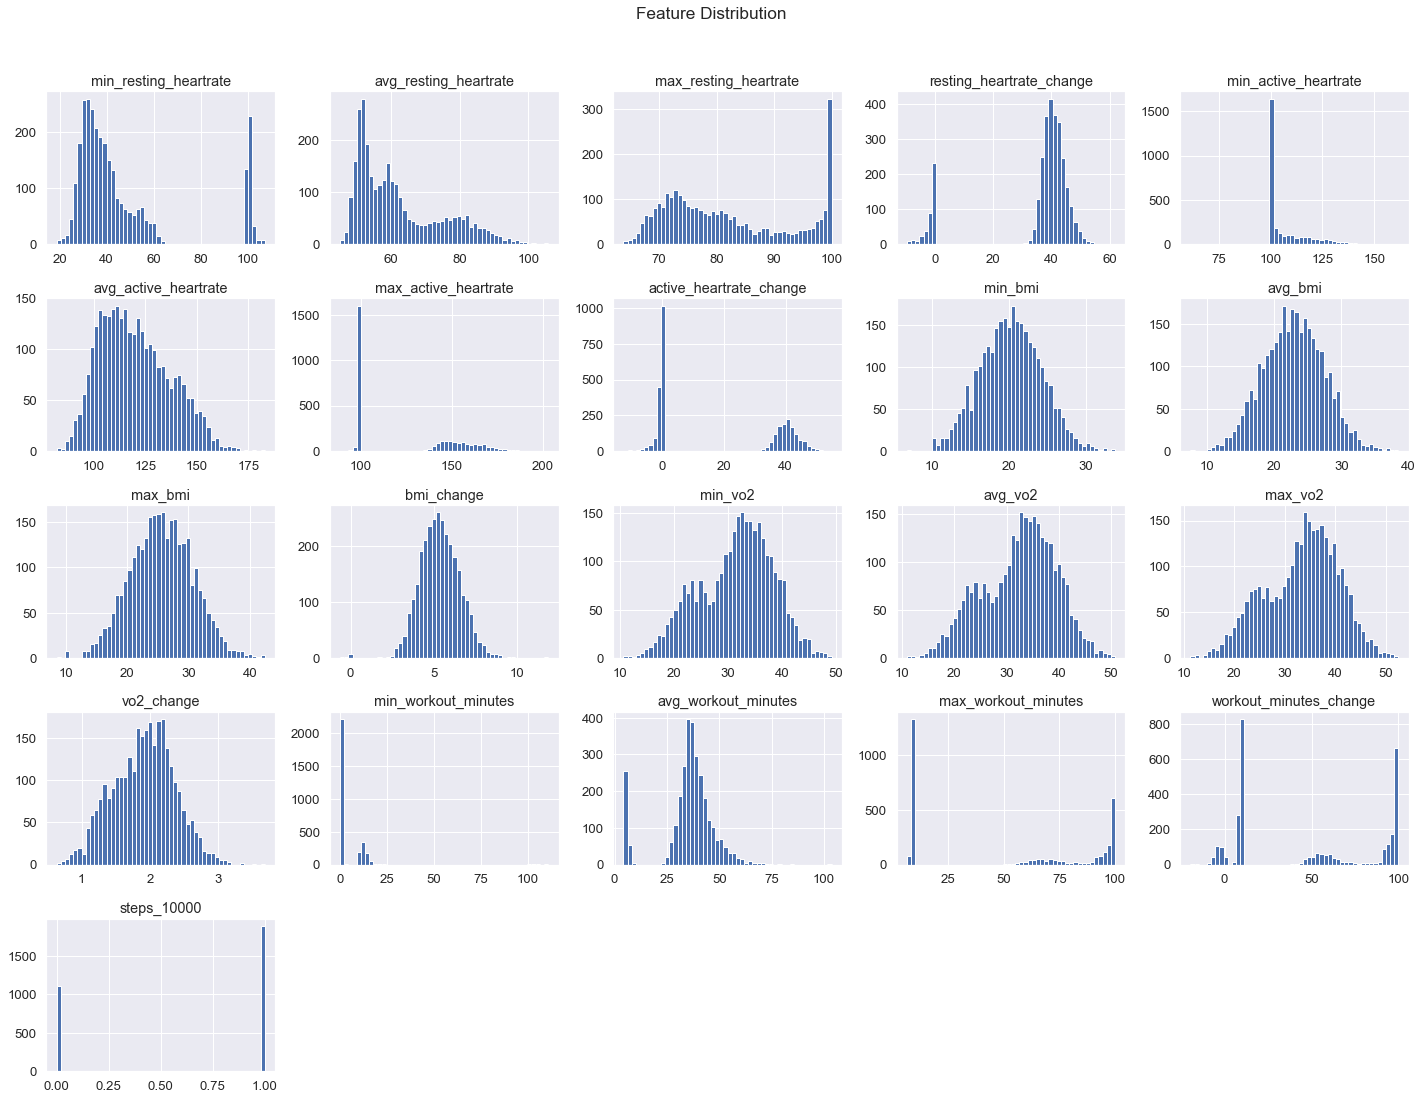

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

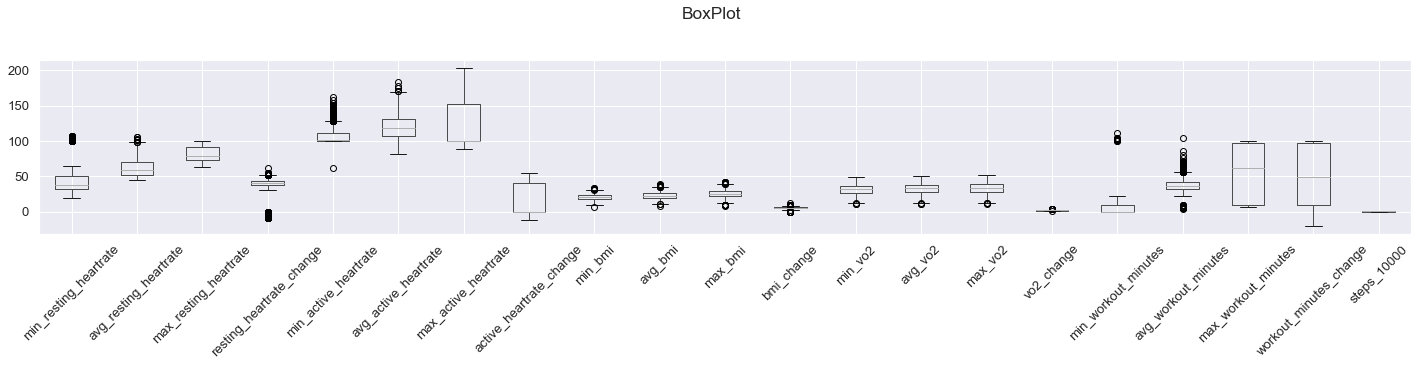

In [10]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation

In [11]:
df.corr()

,min_resting_heartrate,avg_resting_heartrate,max_resting_heartrate,resting_heartrate_change,min_active_heartrate,avg_active_heartrate,max_active_heartrate,active_heartrate_change,min_bmi,avg_bmi,max_bmi,bmi_change,min_vo2,avg_vo2,max_vo2,vo2_change,min_workout_minutes,avg_workout_minutes,max_workout_minutes,workout_minutes_change,steps_10000
min_resting_heartrate,1.000000,0.917461,0.854134,-0.929004,0.660375,0.685939,0.662860,0.594208,0.004606,0.004407,0.005231,0.006808,-0.836145,-0.836072,-0.836194,-0.770445,0.404639,-0.314399,-0.109428,-0.185210,-0.664133
avg_resting_heartrate,0.917461,1.000000,0.956361,-0.729413,0.740186,0.806261,0.770858,0.705034,0.143691,0.143967,0.144641,0.133351,-0.941023,-0.941182,-0.941177,-0.868686,0.456477,-0.374457,-0.113541,-0.199211,-0.758354
max_resting_heartrate,0.854134,0.956361,1.000000,-0.601038,0.724665,0.813552,0.779423,0.724844,0.243923,0.244050,0.243980,0.219749,-0.915875,-0.916018,-0.915989,-0.844894,0.430242,-0.383801,-0.107461,-0.188200,-0.757246
resting_heartrate_change,-0.929004,-0.729413,-0.601038,1.000000,-0.499196,-0.475232,-0.464050,-0.397383,0.166498,0.166892,0.165577,0.145910,0.633256,0.633041,0.633249,0.582798,-0.315690,0.210058,0.091701,0.150709,0.481787
min_active_heartrate,0.660375,0.740186,0.724665,-0.499196,1.000000,0.895734,0.858422,0.696480,0.199646,0.201778,0.202335,0.191111,-0.684981,-0.685335,-0.685650,-0.641278,0.347634,-0.438287,-0.175908,-0.239524,-0.701722
avg_active_heartrate,0.685939,0.806261,0.813552,-0.475232,0.895734,1.000000,0.903136,0.811623,0.328193,0.328879,0.328140,0.295113,-0.789265,-0.789361,-0.789392,-0.728560,0.393046,-0.393310,-0.078469,-0.152586,-0.747991
max_active_heartrate,0.662860,0.770858,0.779423,-0.464050,0.858422,0.903136,1.000000,0.965950,0.344271,0.346955,0.347186,0.322222,-0.736726,-0.737166,-0.737524,-0.690979,0.387681,-0.396427,-0.097887,-0.170619,-0.740834
active_heartrate_change,0.594208,0.705034,0.724844,-0.397383,0.696480,0.811623,0.965950,1.000000,0.380912,0.383592,0.383634,0.354373,-0.685130,-0.685568,-0.685908,-0.643177,0.366995,-0.333506,-0.048209,-0.117870,-0.682432
min_bmi,0.004606,0.143691,0.243923,0.166498,0.199646,0.328193,0.344271,0.380912,1.000000,0.996161,0.993353,0.871588,-0.127819,-0.128234,-0.127999,-0.120537,0.058726,-0.377739,-0.187682,-0.195553,-0.284007
avg_bmi,0.004407,0.143967,0.244050,0.166892,0.201778,0.328879,0.346955,0.383592,0.996161,1.000000,0.997329,0.901418,-0.127559,-0.127956,-0.127699,-0.119675,0.059276,-0.377415,-0.186617,-0.194613,-0.285975


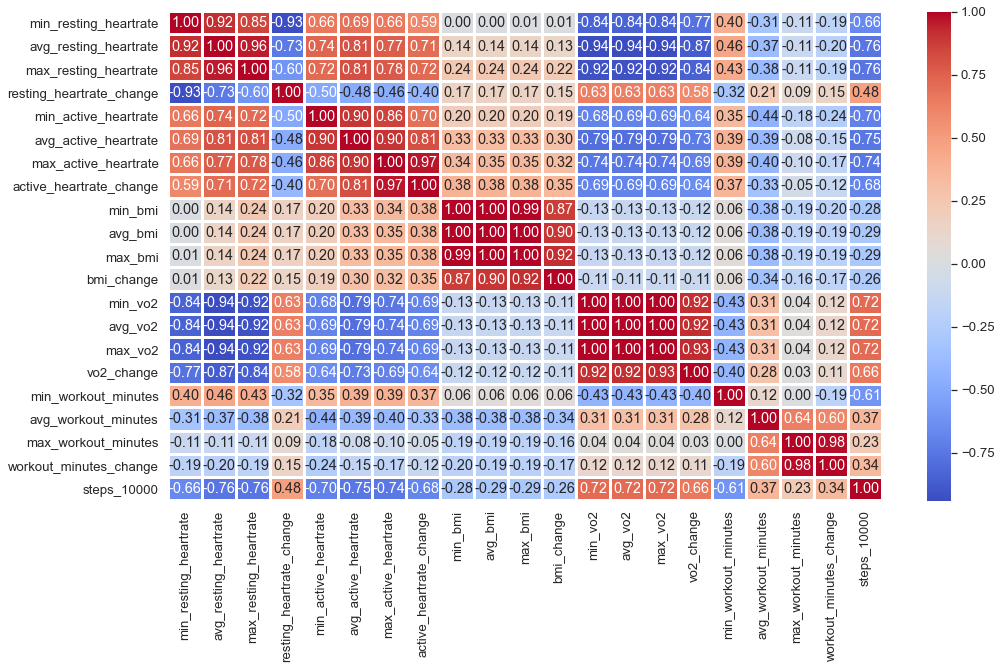

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

min_resting_heartrate       0
avg_resting_heartrate       0
max_resting_heartrate       0
resting_heartrate_change    0
min_active_heartrate        0
avg_active_heartrate        0
max_active_heartrate        0
active_heartrate_change     0
min_bmi                     0
avg_bmi                     0
max_bmi                     0
bmi_change                  0
min_vo2                     0
avg_vo2                     0
max_vo2                     0
vo2_change                  0
min_workout_minutes         0
avg_workout_minutes         0
max_workout_minutes         0
workout_minutes_change      0
steps_10000                 0
dtype: int64

### Treat Duplicate Values

In [14]:
df.duplicated(keep='first').sum()

0

### Train Test Split

In [15]:
df.shape

(3000, 21)

In [16]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [17]:
X.values, y.values

(array([[100.12190323,  82.68379728,  99.13828099, ...,   5.50263247,
           9.32575   ,   8.27881978],
        [ 52.71287565,  77.73294229,  97.93773119, ...,  37.21670181,
          66.11591853,  54.00686244],
        [100.37366098,  86.51162896,  99.78933646, ...,  45.00008651,
          84.72505622,  74.20045006],
        ...,
        [102.1490871 ,  81.90773695,  99.97140766, ...,   5.83814781,
           9.96654765,   7.96793822],
        [ 53.33509302,  69.91086843,  91.67260662, ...,   5.17626546,
           9.12021716,   7.76647751],
        [100.06170256,  97.98210157,  99.85819596, ...,  52.40329518,
           9.69300294,  -4.85712663]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [18]:
X_df, X_test, y_df, y_test = train_test_split(X.values, y.values, test_size=0.15, random_state=0)

In [19]:
X_df.shape, X_test.shape, y_df.shape, y_test.shape

((2550, 20), (450, 20), (2550,), (450,))

In [20]:
X_train, X_val = train_test_split(X_df, test_size=0.3, random_state=0)

In [21]:
X_train.shape, X_val.shape

((1785, 20), (765, 20))

### Model Training

In [22]:
rfc = RandomForestClassifier(random_state=0)

### Using GridSearchCV

In [23]:
model = RandomForestClassifier(random_state=0, n_estimators=100)

In [24]:
parameters = {'max_depth': [2, 3, 5, 8, 10, 15],
              'n_estimators':[5, 10, 25, 50, 100, 250],
              "min_samples_split": [2, 3, 4],
              "min_impurity_decrease": [0.0, 0.01, 0.05]
             }

In [25]:
len(parameters["max_depth"]) * len(parameters["n_estimators"]) * len(parameters["min_samples_split"]) * len(parameters["min_impurity_decrease"])

324

In [26]:
grids = GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',
                     n_jobs=-1,cv=5,verbose=1,return_train_score=True)

In [27]:
X_df, y_df

(array([[ 35.09627453,  55.37917224,  78.70260293, ...,  30.58163194,
           9.85641458,   9.85641458],
        [ 38.38565488,  56.99672978,  77.43499814, ...,  44.37796629,
          97.97712104,  97.97712104],
        [ 30.53096856,  51.01667967,  69.38539889, ...,  50.93746546,
          99.79645858,  99.79645858],
        ...,
        [ 30.24963133,  50.77093707,  70.02994458, ...,  44.89681017,
          98.48183268,  98.48183268],
        [101.64382375,  76.45187198,  96.50663122, ...,   5.30624925,
           8.23494864,   6.6308135 ],
        [ 57.53868268,  77.47657602,  96.36253518, ...,  33.50333059,
          94.45917774,  94.45917774]]),
 array([1, 1, 1, ..., 1, 0, 0], dtype=int64))

In [28]:
grids.fit(X_df, y_df)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  3.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10, 15],
                         'min_impurity_decrease': [0.0, 0.01, 0.05],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 25, 50, 100, 250]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [29]:
grids.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=25,
                       random_state=0)

In [30]:
grids.best_params_

{'max_depth': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_split': 3,
 'n_estimators': 25}

In [31]:
grids.best_score_

0.9905882352941177

In [32]:
grids.error_score

nan

### Model Evaluation

In [33]:
y_pred = grids.predict(X_test)

In [34]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [35]:
y_pred.shape

(450,)

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[151,   3],
       [  3, 293]], dtype=int64)

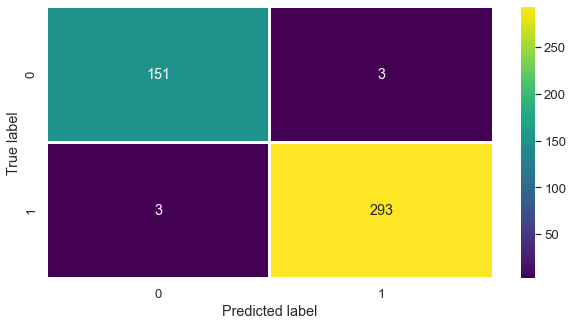

In [37]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       154
           1       0.99      0.99      0.99       296

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



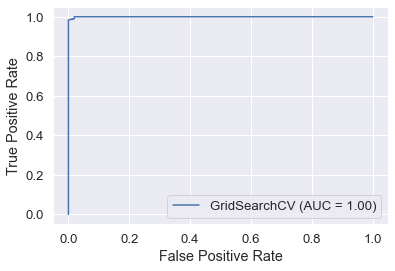

In [39]:
plot_roc_curve(grids,X_test,y_test)
plt.show()